In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [3]:
data3 = pd.read_csv('Invokana.csv')

In [4]:
data3['condition'] = data3['condition'].apply(lambda x: str(x)[-24:])

def dur(text):
    new_duration = ''.join(re.findall('[0-9]+',text))
    if new_duration == '1':
        return .1
    elif new_duration == '16':
        return .3
    elif new_duration == '61':
        return 0.75
    elif new_duration == '12':
        return 1.5
    elif new_duration == '25':
        return 3.5
    elif new_duration == '510':
        return 7.5
    else:
        return ''
    
data3['average_duration'] = [dur(x) for x in data3['duration']]

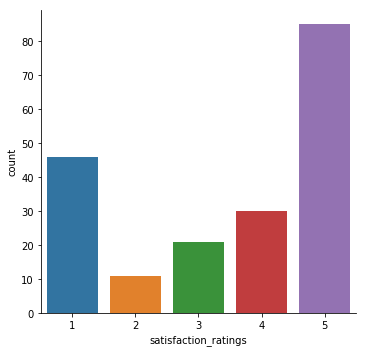

In [5]:
sns.catplot(x="satisfaction_ratings", kind="count", data=data3)

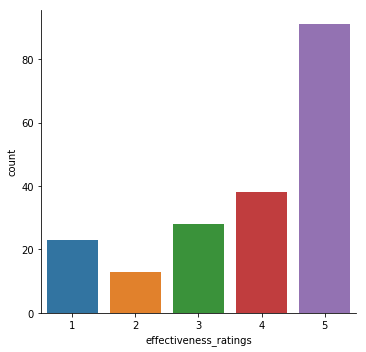

In [6]:
sns.catplot(x="effectiveness_ratings", kind="count", data=data3)

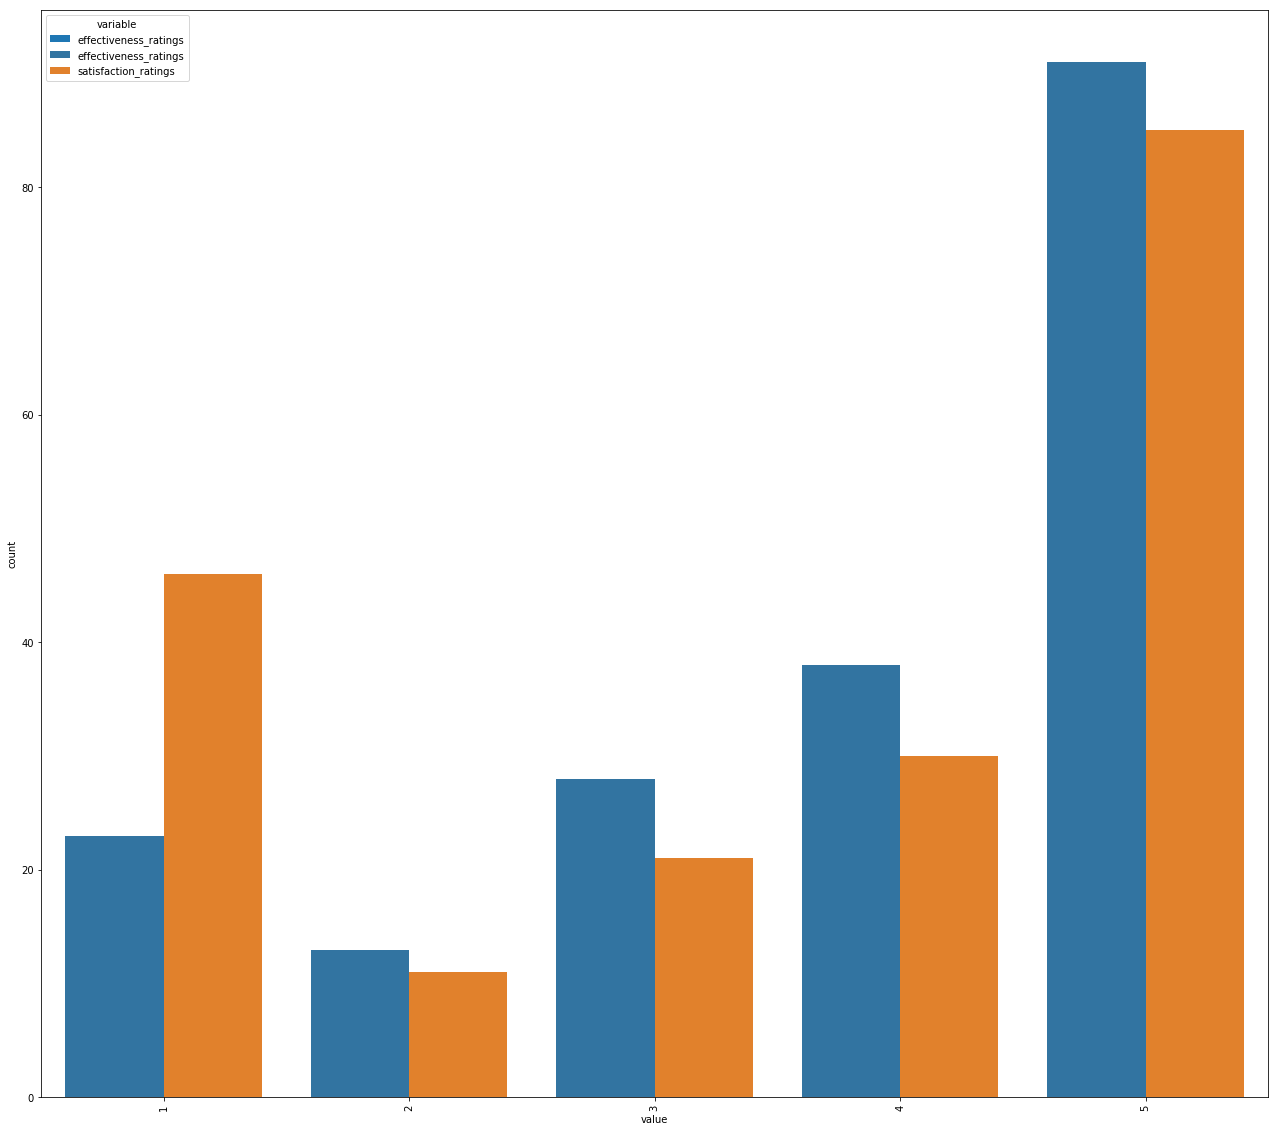

In [9]:
df14 = data3[['satisfaction_ratings', 'effectiveness_ratings']]
df14_melt = df14.melt().groupby(["variable","value"]).agg({
    "value":"count"
}).rename(columns={"value":"count"}).reset_index()

df14.groupby(
    ['satisfaction_ratings', 'effectiveness_ratings']
).agg({"effectiveness_ratings":"count"}).plot.bar(figsize=(22,20))

sns.barplot(x="value", y="count", hue="variable", data=df14_melt)

In [7]:
data3['age_range'].astype('category', categories=['5-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84'], ordered=True)


/Users/oluwolealowolodu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


0      45-54
1      45-54
2      55-64
3      55-64
4      65-74
5      45-54
6      35-44
7      45-54
8      55-64
9      55-64
10     55-64
11     65-74
12     45-54
13     55-64
14     65-74
15     55-64
16     55-64
17     65-74
18     25-34
19     55-64
20     55-64
21     55-64
22     45-54
23     45-54
24     55-64
25     45-54
26     55-64
27     55-64
28     65-74
29     35-44
       ...  
163    45-54
164    55-64
165    25-34
166    55-64
167    45-54
168    55-64
169    45-54
170    65-74
171    45-54
172    55-64
173      NaN
174    45-54
175    55-64
176    55-64
177    55-64
178    55-64
179    45-54
180    65-74
181    65-74
182    65-74
183    55-64
184    55-64
185    55-64
186    65-74
187    65-74
188    55-64
189    45-54
190    55-64
191    45-54
192    35-44
Name: age_range, Length: 193, dtype: category
Categories (8, object): [5-14 < 15-24 < 25-34 < 35-44 < 45-54 < 55-64 < 65-74 < 75-84]

In [8]:
data3['average_duration']=data3['average_duration'].astype('category', categories=[0.1,0.3,0.75,1.5,3.5,7.5], ordered=True)


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


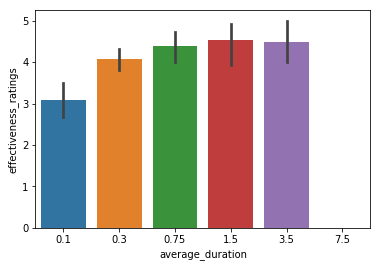

In [31]:
sns.barplot(x="average_duration", y="effectiveness_ratings",data=data3, orient='v')


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


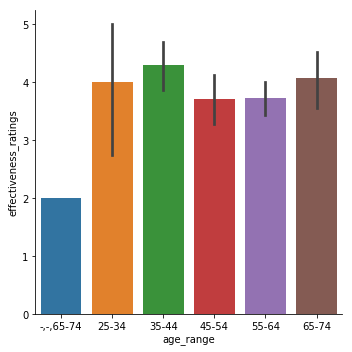

In [33]:
sns.catplot(x="age_range", y="effectiveness_ratings", kind='bar', data=data3.sort_values('age_range'))
sns.catplot(x="age_range", y="effectiveness_ratings", kind='bar', data=data1.sort_values('age_range'));
